# Session – 6: Testing of Hypothesis and Power Curves 

## Tutorial - 6

### A

#### a

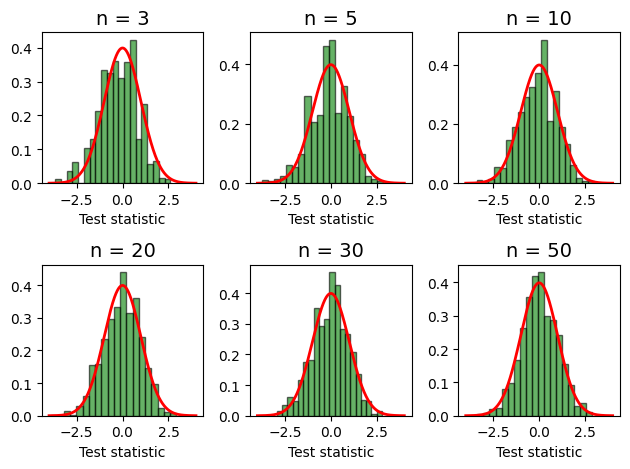

In [11]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_vals = [3,5,10,20,30,50]

λ_0 = 5 # H0: λ = λ_0

for i,n in enumerate(n_vals):
    rep = 1000
    T_0 = []

    for _ in range(rep):
        x = np.random.poisson(λ_0,n)
        T_0.append((np.mean(x) - λ_0)/np.sqrt(np.mean(x)/n))
    plt.subplot(2, 3, i + 1)
    plt.hist(T_0, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), 'r', lw=2)
    plt.title(f'n = {n}', fontsize=14)
    plt.xlabel(r'Test statistic')


plt.tight_layout()
plt.show()


#### b

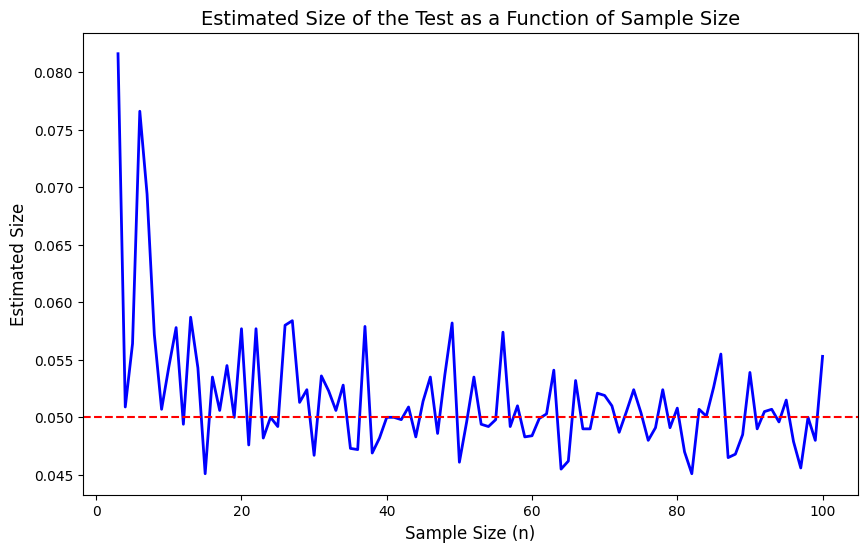

In [21]:
n_range = np.arange(3, 101)
alpha = 0.05
size_estimates = []
z_alpha_over_2 = stats.norm.ppf(1 - alpha / 2)
lambda_0 = 5  # Null hypothesis parameter


for n in n_range:
    rep = 10000
    reject_null = 0
    for i in range(rep):
        x = np.random.poisson(lam=lambda_0, size=n)
        lambda_hat = np.mean(x)
        se_lambda_hat = np.sqrt(lambda_hat / n)
        test_stat = (lambda_hat - lambda_0) / se_lambda_hat
        if np.abs(test_stat) > z_alpha_over_2:
            reject_null += 1
    size_estimates.append(reject_null / rep)

plt.figure(figsize=(10, 6))
plt.plot(n_range, size_estimates, 'b-', lw=2)
plt.axhline(y=alpha, color='r', linestyle='--')
plt.xlabel('Sample Size (n)', fontsize=12)
plt.ylabel('Estimated Size', fontsize=12)
plt.title('Estimated Size of the Test as a Function of Sample Size', fontsize=14)
plt.show()


#### c

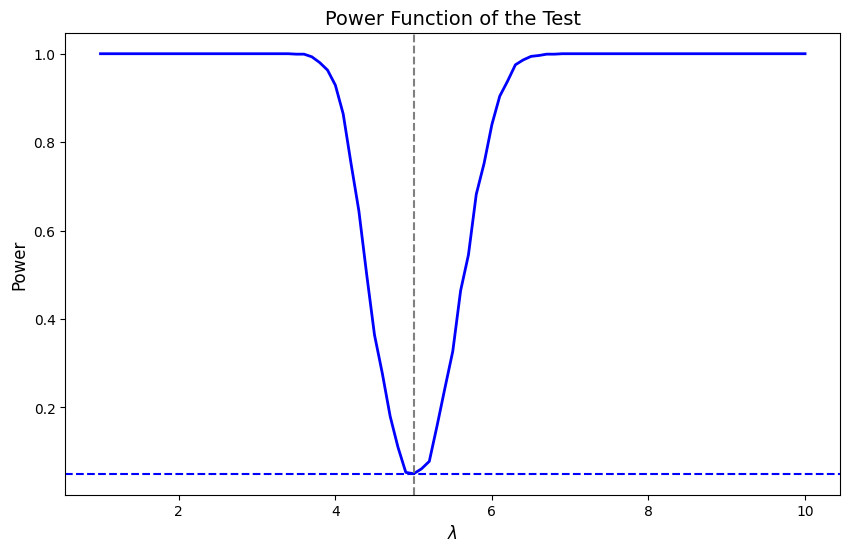

In [23]:
n = 50  # Choosing a sample size for the power function
M = 10**3  # Number of repetitions
lambda_vals = np.arange(1, 10.1, 0.1)
power_vals = []

for lam in lambda_vals:
    reject_null = 0
    for i in range(M):
        x = np.random.poisson(lam=lam, size=n)
        lambda_hat = np.mean(x)
        se_lambda_hat = np.sqrt(lambda_hat / n)
        test_stat = (lambda_hat - lambda_0) / se_lambda_hat
        if np.abs(test_stat) > z_alpha_over_2:
            reject_null += 1
    power_vals.append(reject_null / M)

plt.figure(figsize=(10, 6))
plt.plot(lambda_vals, power_vals, 'b-', lw=2)
plt.xlabel(r'$\lambda$', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('Power Function of the Test', fontsize=14)
plt.axvline(x=lambda_0, color='grey', linestyle='--')
plt.axhline(y=0.05, color='blue', linestyle='--')
plt.show()


### B

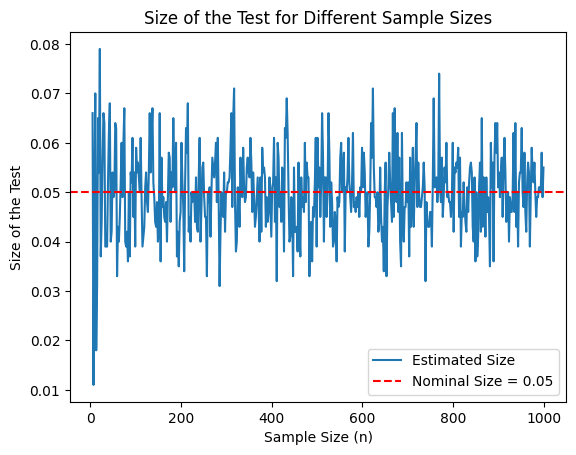

In [12]:
#size of the test
import numpy as np
import matplotlib.pyplot as plt

# Parameters
alpha = 0.05
M = 10**3 # Number of repetitions

# Function to simulate the test statistic under H0: p = 0.5
def test_statistic(n):
    sample = np.random.binomial(1, 0.5, n)
    X_bar = np.mean(sample)
    se_X_bar = np.sqrt(0.5 * (1 - 0.5) / n)
    test_stat = np.abs(X_bar - 0.5) / se_X_bar
    return test_stat > 1.96

# Function to calculate the size of the test
def calculate_size(n):
    rejections = np.sum([test_statistic(n) for _ in range(M)])
    return rejections / M

# Calculate size for different sample sizes
n_values = np.arange(5, 1000, 2)
sizes = [calculate_size(n) for n in n_values]

# Plotting the size of the test
plt.plot(n_values, sizes, label='Estimated Size')
plt.axhline(y=alpha, color='r', linestyle='--', label='Nominal Size = 0.05')
plt.xlabel('Sample Size (n)')
plt.ylabel('Size of the Test')
plt.legend()
plt.title('Size of the Test for Different Sample Sizes')
plt.show()





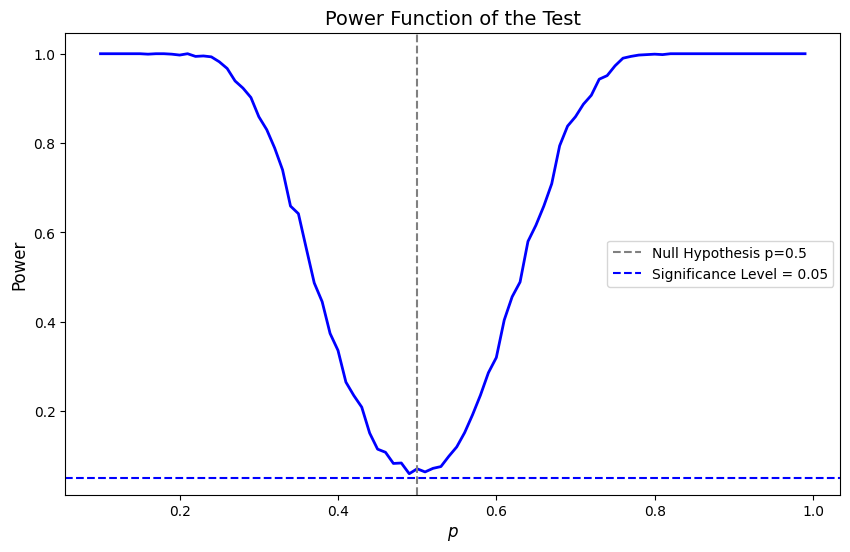

In [13]:
#power function of the test
# Parameters
n = 50  # Sample size
M = 10**3  # Number of repetitions
alpha = 0.05
z_alpha_over_2 = 1.96  # Critical value for two-tailed test at alpha = 0.05
p_vals = np.arange(0.1, 1.0, 0.01)
power_vals = []

# Function to simulate the test statistic under H1: p = p1
def test_statistic_power(n, p1):
    sample = np.random.binomial(1, p1, n)
    X_bar = np.mean(sample)
    se_X_bar = np.sqrt(p1 * (1 - p1) / n)
    test_stat = np.abs(X_bar - 0.5) / se_X_bar
    return test_stat > z_alpha_over_2

# Calculate power for different p values
for p1 in p_vals:
    rejections = np.sum([test_statistic_power(n, p1) for _ in range(M)])
    power_vals.append(rejections / M)

# Plotting the power function
plt.figure(figsize=(10, 6))
plt.plot(p_vals, power_vals, 'b-', lw=2)
plt.xlabel(r'$p$', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.title('Power Function of the Test', fontsize=14)
plt.axvline(x=0.5, color='grey', linestyle='--', label='Null Hypothesis p=0.5')
plt.axhline(y=alpha, color='blue', linestyle='--', label='Significance Level = 0.05')
plt.legend()
plt.show()





### C

Type I error (alpha): 0.135644
Type II error (beta): 0.631314
Power: 0.368686


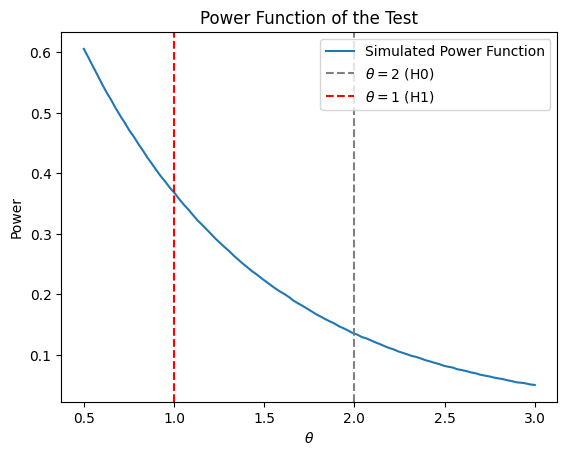

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
M = 10**6  # Number of repetitions
theta_0 = 2  # Null hypothesis
theta_1 = 1  # Alternative hypothesis
critical_value = 1

# Simulate Type I error
x_null = np.random.exponential(1/theta_0, M)
type_I_error = np.mean(x_null >= critical_value)

# Simulate Type II error
x_alt = np.random.exponential(1/theta_1, M)
type_II_error = np.mean(x_alt < critical_value)

# Calculate power
power = 1 - type_II_error

# Output the results
print(f"Type I error (alpha): {type_I_error:.6f}")
print(f"Type II error (beta): {type_II_error:.6f}")
print(f"Power: {power:.6f}")

# Verify power function for different theta values
theta_values = np.linspace(0.5, 3, 100)
power_function = [np.mean(np.random.exponential(1/θ, M) >= critical_value) for θ in theta_values]

# Plot the power function
plt.plot(theta_values, power_function, label='Simulated Power Function')
plt.xlabel(r'$\theta$')
plt.ylabel('Power')
plt.title('Power Function of the Test')
plt.axvline(x=theta_0, color='grey', linestyle='--', label=r'$\theta = 2$ (H0)')
plt.axvline(x=theta_1, color='red', linestyle='--', label=r'$\theta = 1$ (H1)')
plt.legend()
plt.show()


## Handout - 6 (I)

### (a)

#### a)

Simulation of the observations from the population distribution. 

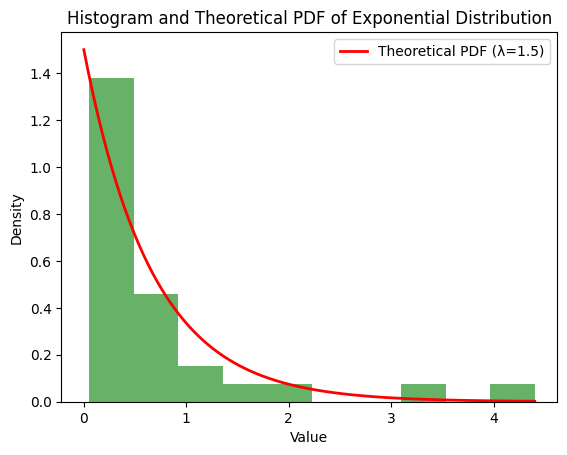

In [38]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Parameters
λ = 1.5  # rate parameter for the simulation
λ_H0 = 2 # maximum value under H0, H0 <= 2; H1 > 2

n = 30

# Generate sample data from an exponential distribution
x = np.random.exponential(1/λ, n)

# Plot the histogram of the sample data
plt.hist(x, bins=10, density=True, alpha=0.6, color='g')

# Generate values for the x-axis to plot the PDF
x_vals = np.linspace(0, np.max(x), 100)

# Plot the theoretical PDF of the exponential distribution
plt.plot(x_vals, st.expon.pdf(x_vals, scale=1/λ), 'r-', lw=2, label=f'Theoretical PDF (λ={λ})')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Theoretical PDF of Exponential Distribution')
plt.legend()

# Show the plot
plt.show()


#### b)

Computation of the Likelihood function ℒ(𝜆) and plot it as a function of 𝜆 in some subset 
of the interval (0, ∞). 

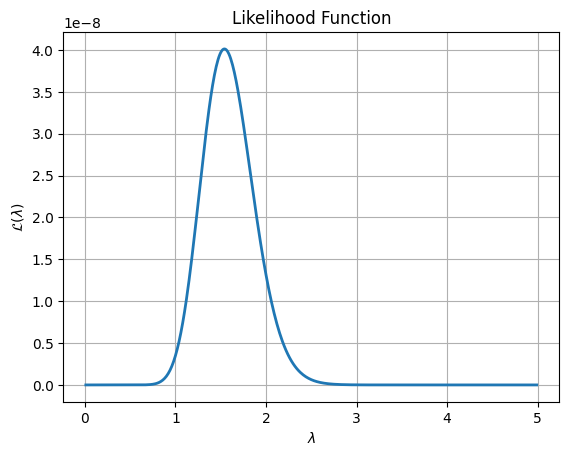

In [40]:
#b) Computation of the Likelihood function ℒ(𝜆) and plot it as a function of 𝜆

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

λ = 1.5
n = 30
x = np.random.exponential(scale=1/λ, size=n)

# Likelihood function based on exponential distribution
def Lik(param):
    lambda_val = param
    return np.prod(st.expon.pdf(x, scale=1/lambda_val))

# Values of lambda to evaluate likelihood
lambda_vals = np.arange(0.01, 5, 0.01)

# Compute likelihood for each lambda value
likelihood_vals = [Lik(lambda_val) for lambda_val in lambda_vals]

# Plot likelihood function
plt.plot(lambda_vals, likelihood_vals, linewidth=2)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\mathcal{L}(\lambda)$')
plt.title('Likelihood Function')
plt.grid(True)
plt.show()



#### c)

 Construction of the log-likelihood function ℓ(𝜆) function and plot it as a function of 𝜆.

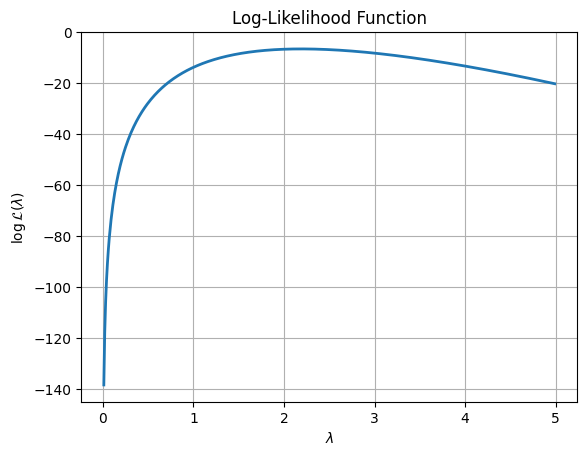

In [47]:
#c)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

λ = 1.5
n = 30
x = np.random.exponential(scale=1/λ, size=n)

# Log-likelihood function based on exponential distribution
def loglikelihood(param):
    lambda_val = param
    return np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))

# Values of lambda to evaluate log-likelihood
lambda_vals = np.arange(0.01, 5, 0.01)

# Compute log-likelihood for each lambda value
loglikelihood_vals = [loglikelihood(lambda_val) for lambda_val in lambda_vals]

# Plot log-likelihood function
plt.plot(lambda_vals, loglikelihood_vals, linewidth=2)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\log \mathcal{L}(\lambda)$')
plt.title('Log-Likelihood Function')
plt.grid(True)
plt.show()



#### d)

Construction of the negative log-likelihood function and plot it. You are encouraged to see 
that whether the function is attaining the minimum which is close to the true value of 𝜆. 

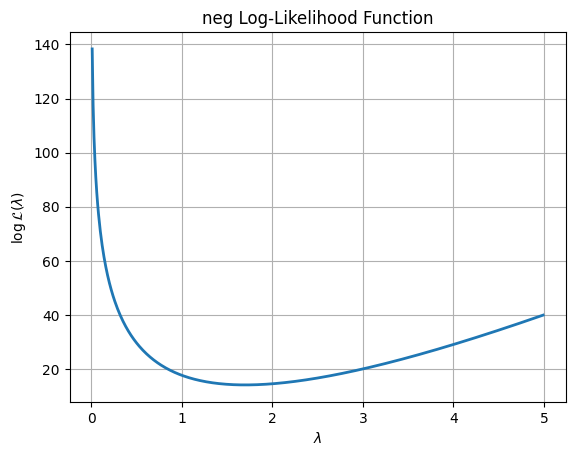

In [50]:
#d)

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

lambda_used = 1.5
n = 30
x = np.random.exponential(scale=1/lambda_used, size=n)

# Log-likelihood function based on exponential distribution
def negloglikelihood(param,x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))

# Values of lambda to evaluate log-likelihood
lambda_vals = np.arange(0.01, 5, 0.01)

# Compute log-likelihood for each lambda value
negloglikelihood_vals = [negloglikelihood(lambda_val,x) for lambda_val in lambda_vals]

# Plot log-likelihood function
plt.plot(lambda_vals, negloglikelihood_vals, linewidth=2)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\log \mathcal{L}(\lambda)$')
plt.title('neg Log-Likelihood Function')
plt.grid(True)
plt.show()



### (b)

In [91]:
import scipy.optimize as spo

def negloglikelihood(param,x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))

λ = 1.5
n = 300
x = np.random.exponential(scale=1/λ, size=n)

initial_guess = 1
result_global = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="BFGS")
λ_MLE_global = result_global.x[0]
print(λ_MLE_global)

1.4821322806150294


### (c)

In [104]:
import scipy.optimize as spo

def negloglikelihood(param,x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))

λ = 1.5
λ_H0 = 2

n = 300
x = np.random.exponential(scale=1/λ, size=n)

initial_guess = 1
result_H0 = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="L-BFGS-B",bounds = [(0.01,λ_H0)])
λ_MLE_H0 = result_H0.x[0]
print(λ_MLE_H0)

1.5711345405512014


### (d)

Computation of the Likelihood Ratio.  

In [109]:
LikRatio = Lik(param = λ_MLE_H0) / Lik (param = λ_MLE_global)
LikRatio

1.6492884062097246

### (e)

In [4]:
import scipy.optimize as spo
import numpy as np
import scipy.stats as st

def negloglikelihood(param,x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))
    
def Lik(param):
    lambda_val = param
    return np.prod(st.expon.pdf(x, scale=1/lambda_val))


λ = 1.5
λ_H0 = 2
          
c = 0.8
M = 1000
n =100
Likratio = []

for i in range(1,M):
    x = np.random.exponential(1/λ,n)
    initial_guess = 1
    result_H = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="BFGS")
    λ_MLE_H = result_H.x[0]
    result_H0 = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="L-BFGS-B",bounds = [(0.001,λ_H0)])
    λ_MLE_H0 = result_H0.x[0]
    Likratio.append(Lik(λ_MLE_H0)/Lik(λ_MLE_H))

prob_reject = sum(np.array(Likratio) < c)/M
print(prob_reject)
    

0.001


### (f)

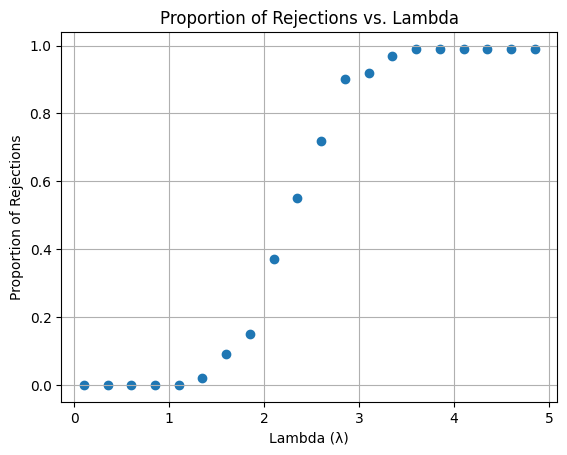

In [35]:
import matplotlib.pyplot as plt

lam_vals =  np.arange(0.1,5,0.25)
prob_reject = []
c = 0.8
M = 100

n =25

for λ in lam_vals:
    Likratio = []
    for i in range(1,M):
        x = np.random.exponential(1/λ,n)
        initial_guess = 1
        result_H = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="BFGS")
        λ_MLE_H = result_H.x[0]
        result_H0 = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="L-BFGS-B",bounds = [(0.01,λ_H0)])
        λ_MLE_H0 = result_H0.x[0]
        Likratio.append(Lik(λ_MLE_H0)/Lik(λ_MLE_H))
    
    prob_reject.append(sum(np.array(Likratio) < c)/M)
plt.scatter(lam_vals,prob_reject)
#plt.scatter(lam_vals, prob_reject)
plt.xlabel('Lambda (λ)')
plt.ylabel('Proportion of Rejections')
plt.title('Proportion of Rejections vs. Lambda')
plt.grid(True)
plt.show()


### (g)

In [32]:
import scipy.optimize as spo
import numpy as np
import scipy.stats as st

def negloglikelihood(param,x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))
    
def Lik(param):
    lambda_val = param
    return np.prod(st.expon.pdf(x, scale=1/lambda_val))


λ = 1.5
λ_H0 = 2  # maximum value of H0 refer to the tutorial sheet
          
c = 0.8
M = 1000
n =25
Likratio = []

for i in range(M):
    x = np.random.exponential(1/λ,n)
    initial_guess = 1
    result_H = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="BFGS")
    λ_MLE_H = result_H.x[0]
    result_H0 = spo.minimize(negloglikelihood,initial_guess,args= (x,), method="L-BFGS-B",bounds = [(0.001,λ_H0)])
    λ_MLE_H0 = result_H0.x[0]
    Likratio.append(Lik(λ_MLE_H0)/Lik(λ_MLE_H))

prob_reject = sum(np.array(Likratio) < c)/M
print(prob_reject)
    

0.032


### (h)

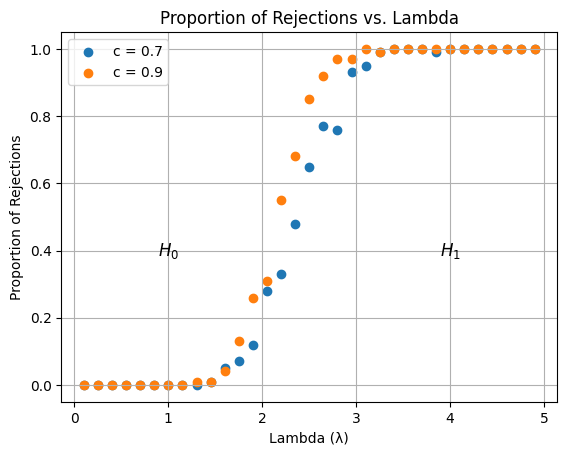

In [2]:
import scipy.optimize as spo
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Define negative log-likelihood function and Likelihood function
def negloglikelihood(param, x):
    lambda_val = param
    return -np.sum(np.log(st.expon.pdf(x, scale=1/lambda_val)))

def Lik(param):
    lambda_val = param
    return np.prod(st.expon.pdf(x, scale=1/lambda_val))

# Parameters
λ_H0 = 2
M = 100
n = 30
c_vals = [0.7, 0.9]
λ_vals = np.arange(0.1, 5, 0.15)

# List to store rejection probabilities
prob_reject = []

# Loop through each c value
for c in c_vals:
    prob_reject_c = []
    for λ in λ_vals:
        LR = []
        for _ in range(M):
            x = np.random.exponential(1/λ, n)
            initial_guess = 1
            result_H = spo.minimize(negloglikelihood, initial_guess, args=(x,), method="BFGS")
            λ_MLE_H = result_H.x[0]
            result_H0 = spo.minimize(negloglikelihood, initial_guess, args=(x,), method="L-BFGS-B", bounds=[(0.001, λ_H0)])
            λ_MLE_H0 = result_H0.x[0]
            LR.append(Lik(λ_MLE_H0) / Lik(λ_MLE_H))
        
        prob_reject_c.append(sum(np.array(LR) < c) / M)
    
    prob_reject.append(prob_reject_c)

# Plotting
plt.scatter(λ_vals, prob_reject[0], label='c = 0.7')
plt.scatter(λ_vals, prob_reject[1], label='c = 0.9')
plt.xlabel('Lambda (λ)')
plt.ylabel('Proportion of Rejections')
plt.title('Proportion of Rejections vs. Lambda')
plt.grid(True)
plt.legend()

plt.text(1, 0.4, r"$H_0$", fontsize=12, va='center', ha='center')
plt.text(4, 0.4, r"$H_1$", fontsize=12, va='center', ha='center')
plt.show()


## Handout - 6 (II) 
right now in tutorial document it is label Handout (R Handout - III)

### (a) & (b)

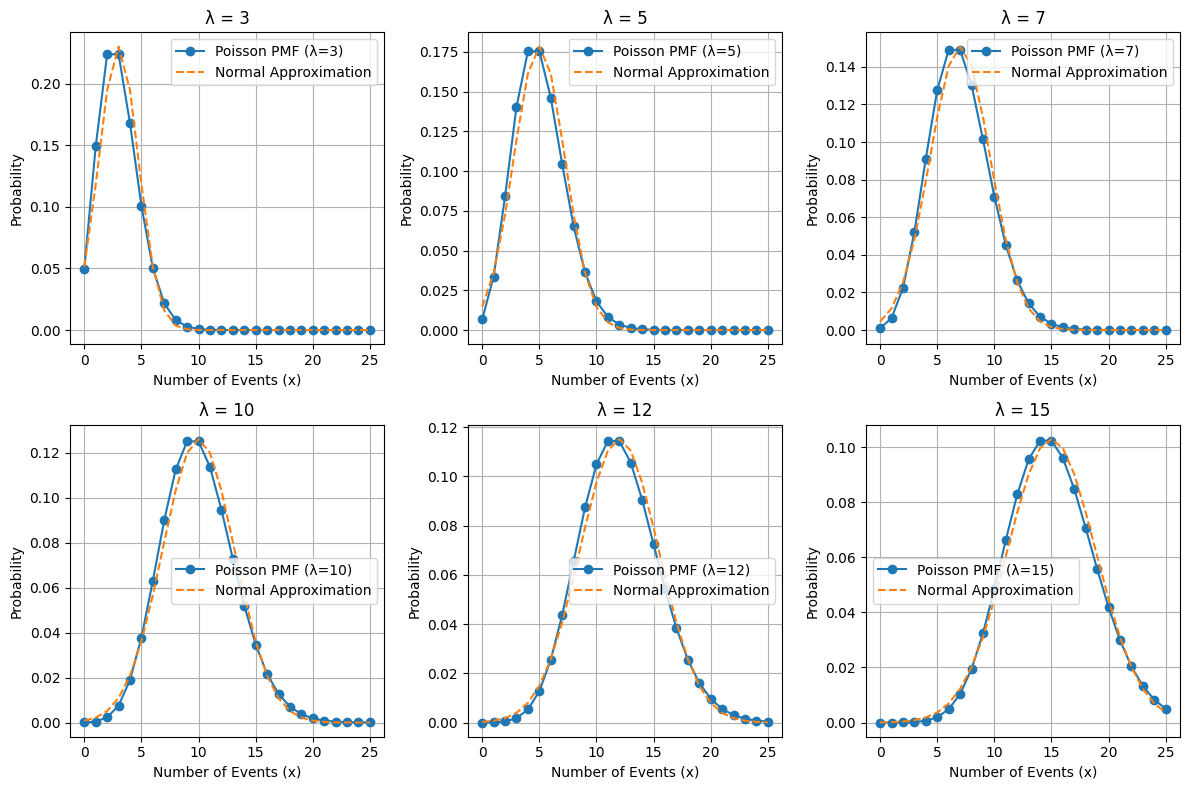

In [29]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

# Define λ values and x range
λ_vals = [3, 5, 7, 10, 12, 15]
x = np.arange(0, 26, 1)

# Plot the Poisson PMF for each λ value in a 2x3 grid
plt.figure(figsize=(12, 8))

for i, λ in enumerate(λ_vals):
    probs = st.poisson.pmf(x, λ)
    normal_approx = st.norm.pdf(x, λ, np.sqrt(λ))
    
    plt.subplot(2, 3, i + 1)
    plt.plot(x, probs, marker='o', linestyle='-', label=f'Poisson PMF (λ={λ})')
    plt.plot(x, normal_approx, linestyle='--', label='Normal Approximation')
    plt.xlabel('Number of Events (x)')
    plt.ylabel('Probability')
    plt.title(f'λ = {λ}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


### (c)

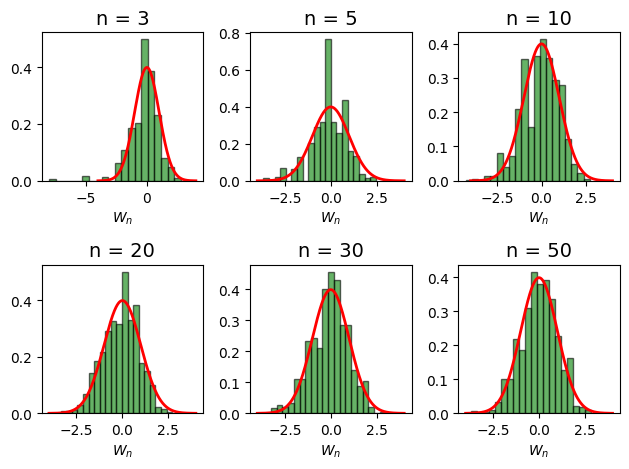

In [3]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.stats import norm

n_vals = [3,5,10,20,30,50]

λ_0 = 3 # H0: λ = λ_0

for i,n in enumerate(n_vals):
    rep = 1000
    T_0 = []

    for _ in range(rep):
        x = np.random.poisson(λ_0,n)
        T_0.append((np.mean(x) - λ_0)/np.sqrt(np.mean(x)/n))
    plt.subplot(2, 3, i + 1)
    plt.hist(T_0, bins=20, density=True, alpha=0.6, color='g', edgecolor='black')
    x = np.linspace(-4, 4, 1000)
    plt.plot(x, norm.pdf(x, 0, 1), 'r', lw=2)
    plt.title(f'n = {n}', fontsize=14)
    plt.xlabel(r'$W_n$')


plt.tight_layout()
plt.show()


### (d)

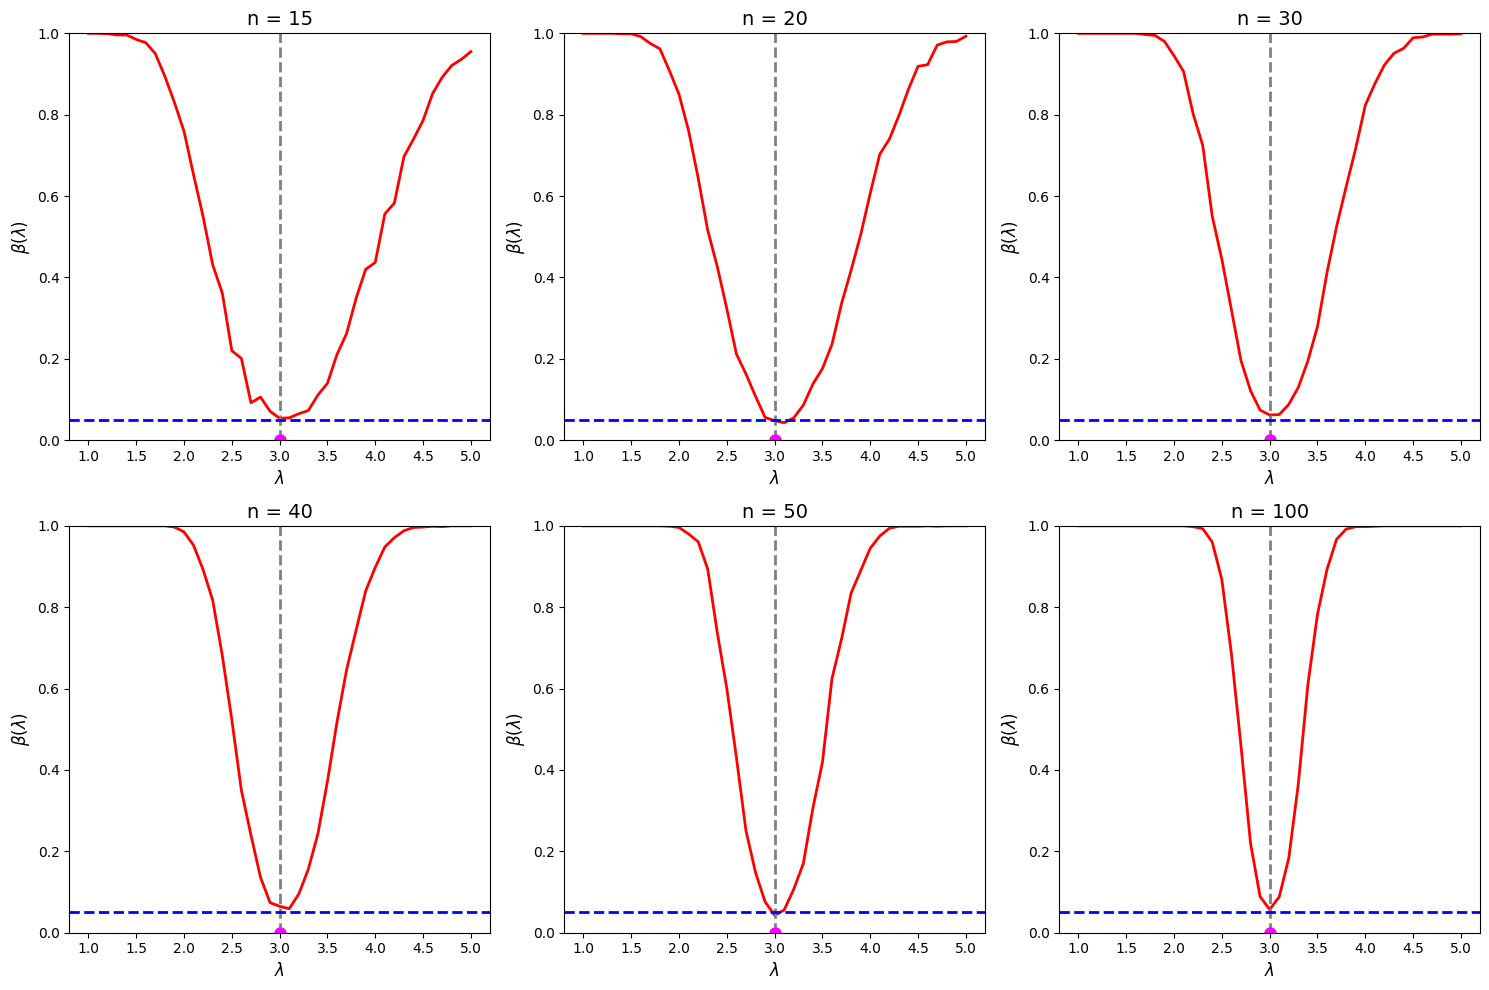

In [9]:
import numpy as np
import matplotlib.pyplot as plt

n_vals = [15, 20, 30, 40, 50, 100]  # varying sample size
lambda_vals = np.arange(1, 5.1, 0.1)
lambda_0 = 3  # parameter under H0
rep = 1000 # number of replications

plt.figure(figsize=(15, 10))

for idx, n in enumerate(n_vals):
    power_vals = np.zeros(len(lambda_vals))
    for j, lam in enumerate(lambda_vals):
        test_stat = np.zeros(rep)
        for i in range(rep):
            x = np.random.poisson(lam=lam, size=n)  # Simulation
            test_stat[i] = (np.mean(x) - lambda_0) / np.sqrt(np.mean(x) / n)
        power_vals[j] = np.sum(np.abs(test_stat) > 1.96) / rep

    plt.subplot(2, 3, idx + 1)
    plt.plot(lambda_vals, power_vals, 'r-', lw=2)
    plt.xlabel(r'$\lambda$', fontsize=12)
    plt.ylabel(r'$\beta(\lambda)$', fontsize=12)
    plt.ylim(0, 1)
    plt.title(f'n = {n}', fontsize=14)
    plt.axvline(x=lambda_0, color='grey', lw=2, linestyle='--')
    plt.axhline(y=0.05, color='blue', lw=2, linestyle='--')
    plt.plot(lambda_0, 0, 'o', color='magenta', markersize=8)

plt.tight_layout()
plt.show()


## Handout - 6 (III) 
label as Handout(R Handout - IV) in the sir's document

In [15]:
# problem where more than one parameter is involved

### a)

In [6]:
import numpy as np
from scipy.stats import beta

n = 50
m = 50
μ = 3
θ = 3

x = np.random.beta(μ,1,n)
y = np.random.beta(θ,1,m)


### b)

In [7]:
import numpy as np
from scipy.stats import beta

def Lik(mu,theta):
    # Calculate the product of beta pdfs for x and y
    likelihood_x = np.prod(beta.pdf(x, a=mu, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=theta, b=1))
    return likelihood_x * likelihood_y


### c)

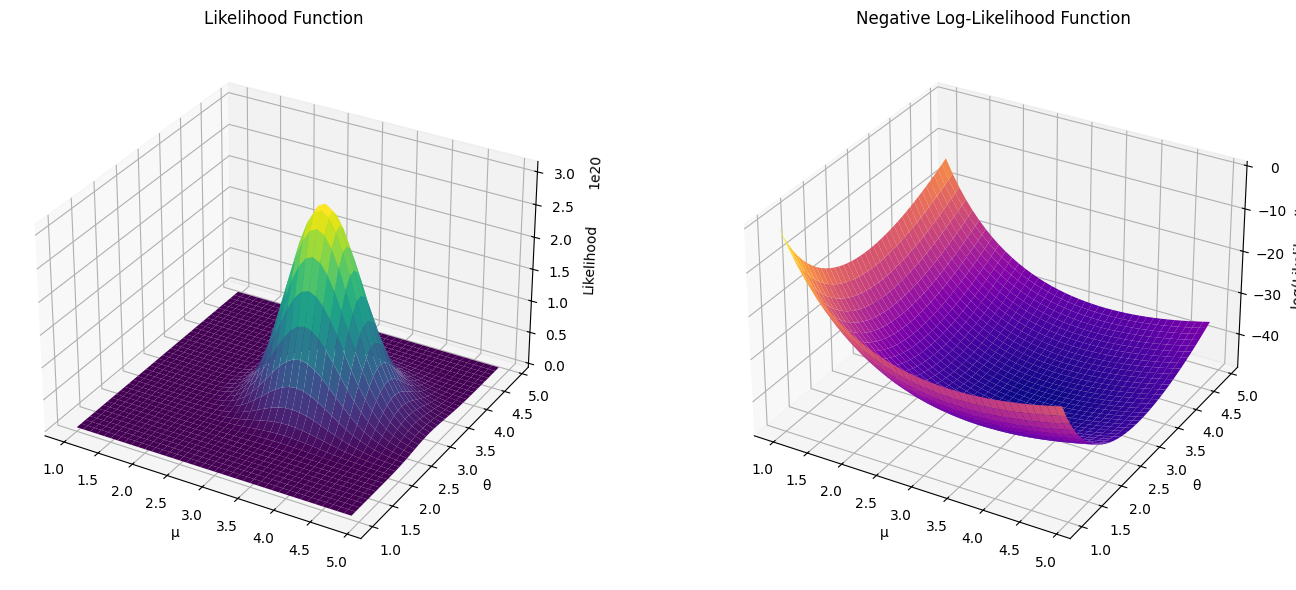

In [24]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import beta

# Define parameters
n = 50
m = 50

# Generate random samples for x and y
μ = 3
θ = 3
x = np.random.beta(μ, 1, n)
y = np.random.beta(θ, 1, m)

# Likelihood function
def Lik(mu, theta):
    likelihood_x = np.prod(beta.pdf(x, a=mu, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=theta, b=1))
    return likelihood_x * likelihood_y

# Create a grid of μ and θ values
μ_vals = np.arange(1, 5, 0.1)
θ_vals = np.arange(1, 5, 0.1)
μ_mesh, θ_mesh = np.meshgrid(μ_vals, θ_vals)

# Compute likelihood for each pair of μ and θ
likelihoods = np.zeros_like(μ_mesh)
for i in range(len(μ_vals)):
    for j in range(len(θ_vals)):
        likelihoods[i, j] = Lik(μ_mesh[i, j], θ_mesh[i, j])

# Compute negative log-likelihood
neg_log_likelihoods = -np.log(likelihoods)

# Plotting the 3D surface of likelihood
fig = plt.figure(figsize=(15, 6))

# Plot likelihood surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf1 = ax1.plot_surface(μ_mesh, θ_mesh, likelihoods, cmap='viridis')
ax1.set_xlabel('μ')
ax1.set_ylabel('θ')
ax1.set_zlabel('Likelihood')
ax1.set_title('Likelihood Function')

# Plot negative log-likelihood surface
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
surf2 = ax2.plot_surface(μ_mesh, θ_mesh, neg_log_likelihoods, cmap='plasma')
ax2.set_xlabel('μ')
ax2.set_ylabel('θ')
ax2.set_zlabel('-log(Likelihood)')
ax2.set_title('Negative Log-Likelihood Function')

# Adjust aspect ratio
ax1.set_box_aspect([1.5, 1.5, 1])
ax2.set_box_aspect([1.5, 1.5, 1])

plt.tight_layout()
plt.show()


In [20]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import beta

# Define parameters
n = 50
m = 50

# Generate random samples for x and y
μ = 3
θ = 3
x = np.random.beta(μ, 1, n)
y = np.random.beta(θ, 1, m)

# Negative log-likelihood function
def neg_log_likelihood(params):
    mu = params[0]
    theta = params[1]
    likelihood_x = np.prod(beta.pdf(x, a=mu, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=theta, b=1))
    return -np.log(likelihood_x * likelihood_y)

# Initial parameter values and optimization
initial_guess = [2, 2]  # Initial guess for mu and theta
result = minimize(neg_log_likelihood, initial_guess, method='BFGS')

# Extract estimated parameters
mu_hat = result.x[0]
theta_hat = result.x[1]

print("Estimated mu_hat:", mu_hat)
print("Estimated theta_hat:", theta_hat)


Estimated mu_hat: 3.39077995169559
Estimated theta_hat: 3.2376947528495865


### e)

In [ ]:
def neg_log_likelihood_H0(param):
    likelihood_x = np.prod(beta.pdf(x, a=param, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=param, b=1))
    return -np.log(likelihood_x * likelihood_y)

### f)

In [38]:
def neg_log_likelihood_H0(param):
    likelihood_x = np.prod(beta.pdf(x, a=param, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=param, b=1))
    return -np.log(likelihood_x * likelihood_y)


def neg_log_likelihood(params):
    mu = params[0]
    theta = params[1]
    likelihood_x = np.prod(beta.pdf(x, a=mu, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=theta, b=1))
    return -np.log(likelihood_x * likelihood_y)

def Lik(mu, theta):
    likelihood_x = np.prod(beta.pdf(x, a=mu, b=1))
    likelihood_y = np.prod(beta.pdf(y, a=theta, b=1))
    return likelihood_x * likelihood_y


M = 1000
μ_hat = []
θ_hat = []
param_H0 = []

maxLik_H = []
maxLik_H0 = []

for _ in range(M):
    x = np.random.beta(μ, 1, n)
    y = np.random.beta(θ, 1, m)
    initial_guess = [2, 2]  # Initial guess for mu and theta
    result = minimize(neg_log_likelihood, initial_guess, method='BFGS')
    μ_hat.append(result.x[0])
    θ_hat.append(result.x[1])

    initial_guess_H0 = [2]
    result_H0 = minimize(neg_log_likelihood_H0,initial_guess_H0, method = 'BFGS')
    param_H0.append(result_H0.x[0])


    maxLik_H.append(Lik(result.x[0],result.x[1]))
    maxLik_H0.append(Lik(result_H0.x[0],result_H0.x[0]))

    

### g)

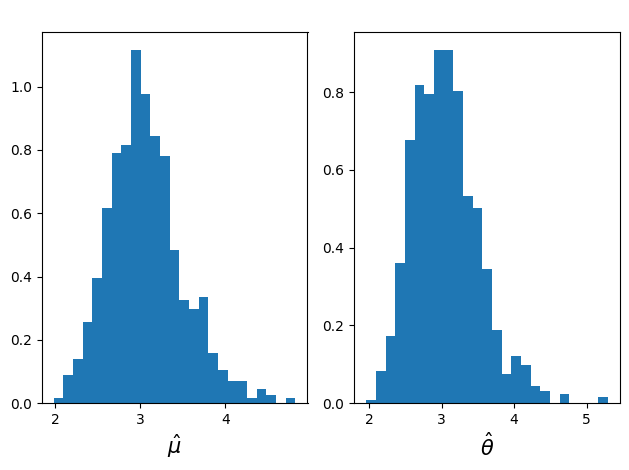

In [36]:
# Histogram for mu_hats
plt.subplot(1, 2, 1)
plt.hist(μ_hat, bins=25, density=True)
plt.title(' ')
plt.xlabel(r'$\hat{\mu}$', fontsize=15)


# Histogram for theta_hats
plt.subplot(1, 2, 2)
plt.hist(θ_hat, bins=25, density=True)
plt.title(' ')
plt.xlabel(r'$\hat{\theta}$', fontsize=15)


plt.tight_layout()
plt.show()

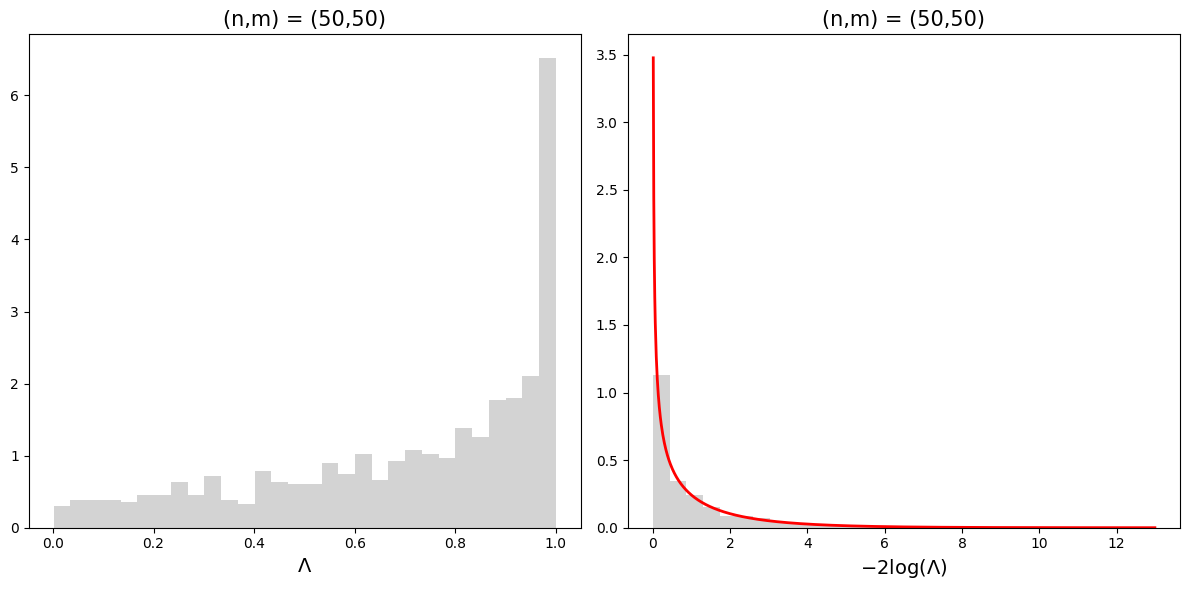

In [50]:
from scipy.stats import beta, chi2

# Wilk's Lambda
Lambda = np.array(maxLik_H0) / np.array(maxLik_H)
Lambda = Lambda[Lambda <= 1]


# Histogram of Lambda
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(Lambda, bins=30, density=True, color='lightgrey')
plt.xlabel(r'$\Lambda$', fontsize=14)
plt.title(f'(n,m) = ({n},{m})', fontsize=15)

# Histogram of W
W = -2 * np.log(Lambda)

plt.subplot(1, 2, 2)
plt.hist(W, bins=30, density=True, color='lightgrey')
plt.xlabel(r'$-2 \log(\Lambda)$', fontsize=14)

# Adding chi-squared distribution curve
x_vals = np.linspace(0, np.max(W), 1000)
plt.plot(x_vals, chi2.pdf(x_vals, df=1), 'r-', lw=2)
plt.title(f'(n,m) = ({n},{m})', fontsize=15)

plt.tight_layout()
plt.show()